In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [3]:
path = 'EmployeeAttrition.csv'
df = pd.read_csv(path)
df

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2


In [4]:
# Confirm start and end dates of data set. Confirm number of employees.
print(df['Emp_ID'].nunique())
print(df['MMM-YY'].max())
print(df['MMM-YY'].min())

2381
2017-12-01
2016-01-01


In [5]:
# Get start date of each employee
gr_df = df.groupby('Emp_ID')
start_date = gr_df['Dateofjoining'].min()
start_date

Emp_ID
1       2015-12-24
2       2017-11-06
4       2016-12-07
5       2016-01-09
6       2017-07-31
           ...    
2784    2012-10-15
2785    2017-08-28
2786    2015-07-31
2787    2015-07-21
2788    2017-06-08
Name: Dateofjoining, Length: 2381, dtype: object

In [6]:
# Confirm where Na values are . . 


In [7]:
# Get finish date of each employee. If last day is blank, employee still here (Dec 2017). att_emp = df for attrition employees
att_emp = df.dropna()
len(att_emp)
att_emp = att_emp.reset_index()
att_emp.columns


Index(['index', 'MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [8]:
# ae_se = reduced df for attrition employees
ae_se = att_emp[['Emp_ID','LastWorkingDate']]
ae_se


,Emp_ID,LastWorkingDate
0,1,2016-03-11
1,4,2017-04-27
2,5,2016-03-07
3,8,2017-11-15
4,12,2016-12-21
...,...,...
1611,2779,2017-02-14
1612,2782,2016-08-16
1613,2785,2017-10-28
1614,2786,2016-09-22


In [9]:
# create new df to store information
# add employee name, columns for start date, finish date & tenure
new_df = pd.DataFrame(start_date)

new_df = new_df.reset_index()
new_df = pd.merge(new_df, ae_se, how='left', on=['Emp_ID'])
new_df['Tenure']=""
new_df

,Emp_ID,Dateofjoining,LastWorkingDate,Tenure
0,1,2015-12-24,2016-03-11,
1,2,2017-11-06,NaN,
2,4,2016-12-07,2017-04-27,
3,5,2016-01-09,2016-03-07,
4,6,2017-07-31,NaN,
...,...,...,...,...
2376,2784,2012-10-15,NaN,
2377,2785,2017-08-28,2017-10-28,
2378,2786,2015-07-31,2016-09-22,
2379,2787,2015-07-21,2016-06-20,


In [10]:
# Formula to calculate Tenure
# new_df['Current_Status'] = ''
# new_df['Current_status'] = new_df['Current_status'].fillna(1)


new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Emp_ID           2381 non-null   int64 
 1   Dateofjoining    2381 non-null   object
 2   LastWorkingDate  1616 non-null   object
 3   Tenure           2381 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.0+ KB


In [11]:
# If LastWorkingDate ==Nan current_status == 1. (this did not work - current status listed as 2 for all employees)
# else current
new_df['Current_Status'] = new_df.loc[new_df['LastWorkingDate'] != 'NaN', 'Current_Status']=2

new_df['LastWorkingDate'].value_counts()
new_df

,Emp_ID,Dateofjoining,LastWorkingDate,Tenure,Current_Status
0,1,2015-12-24,2016-03-11,,2
1,2,2017-11-06,NaN,,2
2,4,2016-12-07,2017-04-27,,2
3,5,2016-01-09,2016-03-07,,2
4,6,2017-07-31,NaN,,2
...,...,...,...,...,...
2376,2784,2012-10-15,NaN,,2
2377,2785,2017-08-28,2017-10-28,,2
2378,2786,2015-07-31,2016-09-22,,2
2379,2787,2015-07-21,2016-06-20,,2


In [12]:
# Display whether employees have left the company with boolean values. (I couldn't work out the current status column)
test_status = pd.notnull(new_df['LastWorkingDate'])
new_df['Left_Company'] = test_status
new_df

,Emp_ID,Dateofjoining,LastWorkingDate,Tenure,Current_Status,Left_Company
0,1,2015-12-24,2016-03-11,,2,True
1,2,2017-11-06,NaN,,2,False
2,4,2016-12-07,2017-04-27,,2,True
3,5,2016-01-09,2016-03-07,,2,True
4,6,2017-07-31,NaN,,2,False
...,...,...,...,...,...,...
2376,2784,2012-10-15,NaN,,2,False
2377,2785,2017-08-28,2017-10-28,,2,True
2378,2786,2015-07-31,2016-09-22,,2,True
2379,2787,2015-07-21,2016-06-20,,2,True


In [13]:
# convert dates to datetime data type & save as series
start_date = pd.to_datetime(new_df['Dateofjoining'],yearfirst=True, errors='ignore')
start_date

0      2015-12-24
1      2017-11-06
2      2016-12-07
3      2016-01-09
4      2017-07-31
          ...    
2376   2012-10-15
2377   2017-08-28
2378   2015-07-31
2379   2015-07-21
2380   2017-06-08
Name: Dateofjoining, Length: 2381, dtype: datetime64[ns]

In [14]:
# convert dates to datetime data type & save as series
end_date = pd.to_datetime(new_df['LastWorkingDate'],yearfirst=True, errors='ignore')
end_date

0      2016-03-11
1             NaT
2      2017-04-27
3      2016-03-07
4             NaT
          ...    
2376          NaT
2377   2017-10-28
2378   2016-09-22
2379   2016-06-20
2380          NaT
Name: LastWorkingDate, Length: 2381, dtype: datetime64[ns]

In [15]:
# Add datetime series to dataframe. Replace null values with 31-Dec-2017
new_df['Start_date']= start_date
new_df['End_date']= end_date
latest_date = pd.to_datetime('2017-12-31')
new_df['End_date'] = new_df['End_date'].fillna(latest_date)
new_df

,Emp_ID,Dateofjoining,LastWorkingDate,Tenure,Current_Status,Left_Company,Start_date,End_date
0,1,2015-12-24,2016-03-11,,2,True,2015-12-24,2016-03-11
1,2,2017-11-06,NaN,,2,False,2017-11-06,2017-12-31
2,4,2016-12-07,2017-04-27,,2,True,2016-12-07,2017-04-27
3,5,2016-01-09,2016-03-07,,2,True,2016-01-09,2016-03-07
4,6,2017-07-31,NaN,,2,False,2017-07-31,2017-12-31
...,...,...,...,...,...,...,...,...
2376,2784,2012-10-15,NaN,,2,False,2012-10-15,2017-12-31
2377,2785,2017-08-28,2017-10-28,,2,True,2017-08-28,2017-10-28
2378,2786,2015-07-31,2016-09-22,,2,True,2015-07-31,2016-09-22
2379,2787,2015-07-21,2016-06-20,,2,True,2015-07-21,2016-06-20


In [16]:
# new_df.loc[new_df['LastWorkingDate']==Nan,'Current_Status']=1

In [17]:
# Formula for tenure in number of days
new_df['Tenure'] = ((new_df.End_date - new_df.Start_date)/np.timedelta64(1,'D'))
try:
    new_df['Tenure'] = new_df['Tenure'].astype(int)
except (ValueError):
    pass
new_df

,Emp_ID,Dateofjoining,LastWorkingDate,Tenure,Current_Status,Left_Company,Start_date,End_date
0,1,2015-12-24,2016-03-11,78,2,True,2015-12-24,2016-03-11
1,2,2017-11-06,NaN,55,2,False,2017-11-06,2017-12-31
2,4,2016-12-07,2017-04-27,141,2,True,2016-12-07,2017-04-27
3,5,2016-01-09,2016-03-07,58,2,True,2016-01-09,2016-03-07
4,6,2017-07-31,NaN,153,2,False,2017-07-31,2017-12-31
...,...,...,...,...,...,...,...,...
2376,2784,2012-10-15,NaN,1903,2,False,2012-10-15,2017-12-31
2377,2785,2017-08-28,2017-10-28,61,2,True,2017-08-28,2017-10-28
2378,2786,2015-07-31,2016-09-22,419,2,True,2015-07-31,2016-09-22
2379,2787,2015-07-21,2016-06-20,335,2,True,2015-07-21,2016-06-20


In [18]:
# designation at latest
# Use SC code for 'df_mostRecent'
df_wk = df.sort_values(["MMM-YY",'Emp_ID'], ascending = False)
df_mostRecent = df_wk.drop_duplicates(subset = 'Emp_ID', keep = 'first').reset_index(drop = True)
df_mostRecent


,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2017-12-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,411480,2
1,2017-12-01,2784,34,Male,C24,College,82815,2012-10-15,NaN,2,3,505480,4
2,2017-12-01,2781,25,Male,C23,Master,46952,2017-02-17,NaN,2,2,2366500,4
3,2017-12-01,2778,35,Male,C13,Master,50180,2017-11-29,NaN,2,2,0,1
4,2017-12-01,2775,27,Male,C9,College,85112,2017-10-02,NaN,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2016-01-01,136,37,Female,C10,College,47009,2015-10-02,2016-01-05,1,1,0,1
2377,2016-01-01,105,38,Male,C4,College,67931,2015-09-18,2016-01-06,1,1,0,1
2378,2016-01-01,86,35,Male,C2,Master,49510,2015-05-28,2016-01-27,1,1,0,1
2379,2016-01-01,70,35,Male,C20,Bachelor,19235,2015-10-08,2016-01-29,1,1,0,1


In [19]:
# add df_mostRecent 'Designation' to new_df as 'MostRecent_Designation'
df_mostRecentDes = df_mostRecent[['Emp_ID','Designation']]
df_mostRecentDes
new_df = pd.merge(new_df,df_mostRecentDes, how='left', on='Emp_ID')
new_df = new_df.rename(columns = {'Designation':'Current_Designation'})
new_df

,Emp_ID,Dateofjoining,LastWorkingDate,Tenure,Current_Status,Left_Company,Start_date,End_date,Current_Designation
0,1,2015-12-24,2016-03-11,78,2,True,2015-12-24,2016-03-11,1
1,2,2017-11-06,NaN,55,2,False,2017-11-06,2017-12-31,2
2,4,2016-12-07,2017-04-27,141,2,True,2016-12-07,2017-04-27,2
3,5,2016-01-09,2016-03-07,58,2,True,2016-01-09,2016-03-07,1
4,6,2017-07-31,NaN,153,2,False,2017-07-31,2017-12-31,3
...,...,...,...,...,...,...,...,...,...
2376,2784,2012-10-15,NaN,1903,2,False,2012-10-15,2017-12-31,3
2377,2785,2017-08-28,2017-10-28,61,2,True,2017-08-28,2017-10-28,1
2378,2786,2015-07-31,2016-09-22,419,2,True,2015-07-31,2016-09-22,2
2379,2787,2015-07-21,2016-06-20,335,2,True,2015-07-21,2016-06-20,1


In [20]:
# get joining designation for each employee
join_des = gr_df['Joining Designation'].mean()
join_des

Emp_ID
1       1
2       2
4       2
5       1
6       3
       ..
2784    2
2785    1
2786    2
2787    1
2788    2
Name: Joining Designation, Length: 2381, dtype: int64

In [21]:
# add joining designation to new_df
new_df = pd.merge(new_df,join_des, how='left', on='Emp_ID')
new_df

,Emp_ID,Dateofjoining,LastWorkingDate,Tenure,Current_Status,Left_Company,Start_date,End_date,Current_Designation,Joining Designation
0,1,2015-12-24,2016-03-11,78,2,True,2015-12-24,2016-03-11,1,1
1,2,2017-11-06,NaN,55,2,False,2017-11-06,2017-12-31,2,2
2,4,2016-12-07,2017-04-27,141,2,True,2016-12-07,2017-04-27,2,2
3,5,2016-01-09,2016-03-07,58,2,True,2016-01-09,2016-03-07,1,1
4,6,2017-07-31,NaN,153,2,False,2017-07-31,2017-12-31,3,3
...,...,...,...,...,...,...,...,...,...,...
2376,2784,2012-10-15,NaN,1903,2,False,2012-10-15,2017-12-31,3,2
2377,2785,2017-08-28,2017-10-28,61,2,True,2017-08-28,2017-10-28,1,1
2378,2786,2015-07-31,2016-09-22,419,2,True,2015-07-31,2016-09-22,2,2
2379,2787,2015-07-21,2016-06-20,335,2,True,2015-07-21,2016-06-20,1,1


Number of employees who joined at Designation 1: 1026


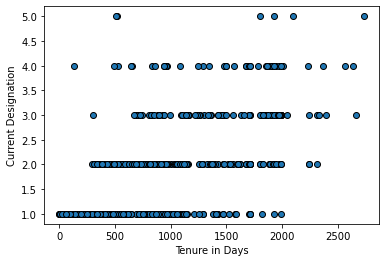

In [22]:
# scatter plot for all employees joining at des1, x axis tenure (days), y current designation
entry_level_df = new_df.loc[new_df['Joining Designation']== 1,:]
entry_level_df
print(f'Number of employees who joined at Designation 1: {len(entry_level_df)}')
x = entry_level_df['Tenure']
y = entry_level_df['Current_Designation']
plt.scatter(x, y, marker='o', edgecolors='k')
plt.xlabel('Tenure in Days')
plt.ylabel('Current Designation')
plt.show()
# expected positive linear correlation, which is somewhat true

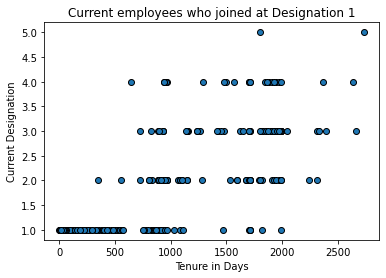

In [23]:
# same plot as above, but grouped by current status
x_current = entry_level_df[entry_level_df['Left_Company']==False]['Tenure']
y_current = entry_level_df[entry_level_df['Left_Company']==False]['Current_Designation']
plt.scatter(x_current, y_current, marker='o', edgecolors='k')
plt.xlabel('Tenure in Days')
plt.ylabel('Current Designation')
plt.title('Current employees who joined at Designation 1')
plt.show()
# similar to above plot

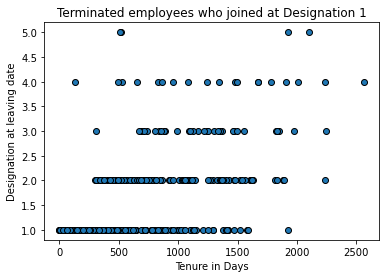

In [24]:
#  same plot as above, but grouped by terminated status
x_term = entry_level_df[entry_level_df['Left_Company']==True]['Tenure']
y_term = entry_level_df[entry_level_df['Left_Company']==True]['Current_Designation']
plt.scatter(x_term, y_term, marker='o', edgecolors='k')
plt.xlabel('Tenure in Days')
plt.ylabel('Designation at leaving date')
plt.title('Terminated employees who joined at Designation 1')
plt.show()
# is it more heavily weighted at the lower designations
# less linear - earlier promotions (level 4)
# need to calculate correaltion for all

In [25]:
# average tenure for all employees
aver_tenure = new_df['Tenure'].mean()
med_tenure = new_df['Tenure'].median()
print(aver_tenure,med_tenure)

437.11717765644687 192.0


In [26]:
# create df for terminated employees only
term_df = new_df.loc[new_df['Left_Company']== True,:]
print('term_df')
term_df

term_df


,Emp_ID,Dateofjoining,LastWorkingDate,Tenure,Current_Status,Left_Company,Start_date,End_date,Current_Designation,Joining Designation
0,1,2015-12-24,2016-03-11,78,2,True,2015-12-24,2016-03-11,1,1
2,4,2016-12-07,2017-04-27,141,2,True,2016-12-07,2017-04-27,2,2
3,5,2016-01-09,2016-03-07,58,2,True,2016-01-09,2016-03-07,1,1
5,8,2017-09-19,2017-11-15,57,2,True,2017-09-19,2017-11-15,3,3
7,12,2016-06-29,2016-12-21,175,2,True,2016-06-29,2016-12-21,1,1
...,...,...,...,...,...,...,...,...,...,...
2373,2779,2017-01-26,2017-02-14,19,2,True,2017-01-26,2017-02-14,3,3
2375,2782,2016-05-16,2016-08-16,92,2,True,2016-05-16,2016-08-16,1,1
2377,2785,2017-08-28,2017-10-28,61,2,True,2017-08-28,2017-10-28,1,1
2378,2786,2015-07-31,2016-09-22,419,2,True,2015-07-31,2016-09-22,2,2


In [27]:
# # create df for current employees only
current_df = new_df.loc[new_df['Left_Company']== False,:]
print('current_df')
current_df

current_df


,Emp_ID,Dateofjoining,LastWorkingDate,Tenure,Current_Status,Left_Company,Start_date,End_date,Current_Designation,Joining Designation
1,2,2017-11-06,NaN,55,2,False,2017-11-06,2017-12-31,2,2
4,6,2017-07-31,NaN,153,2,False,2017-07-31,2017-12-31,3,3
6,11,2017-12-07,NaN,24,2,False,2017-12-07,2017-12-31,1,1
9,14,2017-10-16,NaN,76,2,False,2017-10-16,2017-12-31,3,3
17,25,2014-10-30,NaN,1158,2,False,2014-10-30,2017-12-31,3,1
...,...,...,...,...,...,...,...,...,...,...
2370,2775,2017-10-02,NaN,90,2,False,2017-10-02,2017-12-31,3,3
2372,2778,2017-11-29,NaN,32,2,False,2017-11-29,2017-12-31,2,2
2374,2781,2017-02-17,NaN,317,2,False,2017-02-17,2017-12-31,2,2
2376,2784,2012-10-15,NaN,1903,2,False,2012-10-15,2017-12-31,3,2


In [28]:
# create one list each for terminated, current and all employee groups
# add mean and median tenure values to each list
# combine lists into df for summary statistics
term_list = []
current_list = []
all_list = []

term_list.append(term_df['Tenure'].mean())
term_list.append(term_df['Tenure'].median())
current_list.append(current_df['Tenure'].mean())
current_list.append(current_df['Tenure'].median())
all_list.append(new_df['Tenure'].mean())
all_list.append(new_df['Tenure'].median())



In [29]:
# plot average tenure: box plots

In [30]:
new_df['Current_Designation'].value_counts()

2    855
1    741
3    623
4    138
5     24
Name: Current_Designation, dtype: int64

In [31]:
t_df = new_df.groupby(['Left_Company', 'Current_Designation'])
t_df['Tenure'].mean()


Left_Company  Current_Designation
False         1                       409.496552
              2                       454.047059
              3                       545.804196
              4                      1614.602941
              5                      1968.727273
True          1                       276.812081
              2                       329.121667
              3                       375.418398
              4                      1094.500000
              5                       960.307692
Name: Tenure, dtype: float64

In [32]:
term_gr_d = term_df.groupby('Current_Designation')
mnt_values = term_gr_d['Tenure'].mean().tolist()
term_list.append(mnt_values)
mednt_values = term_gr_d['Tenure'].median().tolist()
term_list.append(mednt_values)
term_list

[357.71534653465346,
 176.0,
 [276.81208053691273,
  329.12166666666667,
  375.4183976261128,
  1094.5,
  960.3076923076923],
 [179, 170, 150, 927, 517]]

In [ ]:
current_gr_d = current_df.groupby('Current_Designation')
current_list.append(current_gr_d['Tenure'].mean())
current_list.append(current_gr_d['Tenure'].median())
current_list

In [ ]:
all_gr_d = new_df.groupby('Current_Designation')
all_list.append(all_gr_d['Tenure'].mean())
all_list.append(all_gr_d['Tenure'].median())
all_list

In [ ]:
summary_df = pd.DataFrame({'Past Employees':term_list,\
                           'Current Employees':current_list,\
                            'All Employees':all_list},
                            index=['Mean Tenure (days)','Median Tenure (days)',\
                                   'Mean Tenure by Designation','Median Tenure by Designation'])
summary_df